In [6]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the Dataset
data = pd.read_csv(r"C:\Users\HP\AppData\Local\Microsoft\Windows\INetCache\IE\7AU9UX2O\creditcard[1].csv")

In [3]:
#Explore the Data
# Display the first few rows of the dataset
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

Class Distribution:
 Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


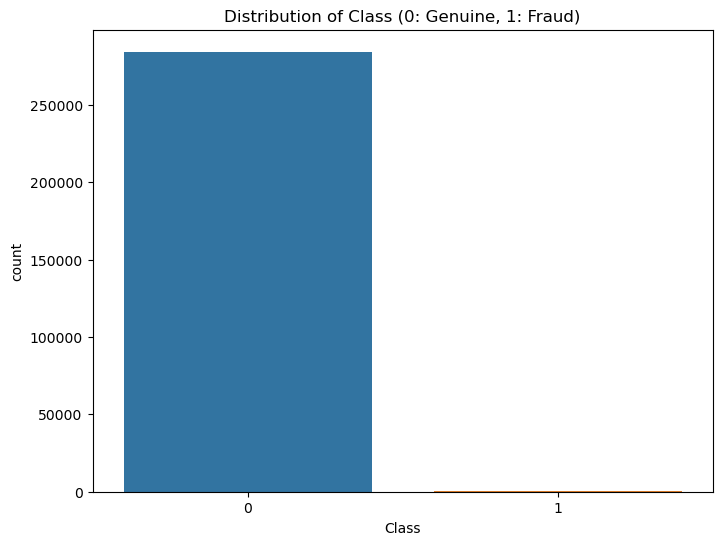

In [4]:
#Check for Imbalance
# Check the distribution of the target variable 'Class'
class_distribution = data['Class'].value_counts(normalize=True)
print("Class Distribution:\n", class_distribution)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Class (0: Genuine, 1: Fraud)')
plt.show()


In [5]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



In [6]:
#Checking the shape of data
data.shape

(284807, 31)

In [7]:
#Getting the data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
#Checking various statistical features
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ... -3.405756e-13 -5.723197e-13 -9.725856e-13  1.464150e-12   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.987102e-13 -5.617874e-13  3.332082e-12 -3.518874e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [9]:
#checking duplicated data
data.duplicated().sum()

1081

In [10]:
#Dropping the duplicated data
data.drop_duplicates(inplace=True)

In [11]:
#Checking if the duplicated data is dropped
data.duplicated().sum()

0

In [12]:
#checking null/NAN values
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
data['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [14]:
x = data.drop(columns = ['Class'])
y = data['Class']

In [15]:
print(x.shape)
x.head()

(283726, 30)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V20       V21       V22       V23       V24  \
0  0.098698  0.363787  ...  0.251412 -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ... -0.069083 -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...  0.524980  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ... -0.208038 -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...  0.408542 -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  
0  0.128539 -0.189115  0.133558 -0.021053  149.62  
1  0.167170  0.125895 -0.008983  0.014724    2.69  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66  
3  0.647376 -0.221929  0.062723  0.061458  123.50  
4 -0.206010  0.502292  0.219422  0.215153   69.99  

[5 rows x 30 columns]

In [16]:
#Train and Test split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, stratify=y)

In [17]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(226980, 30) (226980,) (56746, 30) (56746,)


In [18]:
#checking X_Train data
x_train.head()

Time        V1        V2        V3        V4        V5        V6  \
107780   70615.0  1.219840 -1.216819  1.500564  0.008895 -2.063361  0.170025   
160264  113188.0  2.054593  0.064370 -1.262453  0.265311  0.106680 -1.121405   
123694   77027.0  1.124747  0.115619  0.247097  0.491083 -0.052684  0.164282   
279328  168786.0  1.824941 -1.225289 -0.618124 -0.773638 -0.935551 -0.143382   
262609  160561.0  1.965310 -0.454701 -0.239197  0.530403 -0.844653 -0.549899   

              V7        V8        V9  ...       V20       V21       V22  \
107780 -1.418221  0.253406  0.851582  ... -0.515353 -0.595305 -0.878781   
160264  0.249510 -0.383204  0.555853  ... -0.167793  0.303025  1.073716   
123694 -0.256963  0.292564 -0.046438  ... -0.213294 -0.194051 -0.588104   
279328 -0.803270  0.038586  2.021295  ...  0.108967  0.039812 -0.015999   
262609 -0.649124 -0.008303  1.550473  ... -0.262972  0.193675  0.797873   

             V23       V24       V25       V26       V27       V28  Amount  
107780  0.082643  0.426885  0.094261  1.031082  0.009885  0.023069   36.65  
160264  0.048564  1.200883  0.338000 -0.482208  0.011422 -0.040529    1.00  
123694  0.191997 -0.361224 -0.003793  0.140432 -0.001894  0.011209    1.98  
279328  0.068913 -0.966752 -0.517507  0.584983 -0.044843 -0.029786  143.22  
262609  0.132466 -0.002785 -0.130629 -0.208265  0.041368 -0.037969    9.99  

[5 rows x 30 columns]

In [19]:
#Scaling the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
x_train_scaled[0]

array([-0.50899708,  0.6218505 , -0.73205266,  0.98995281,  0.00867287,
       -1.4935236 ,  0.12945123, -1.1491208 ,  0.21514584,  0.779021  ,
        0.2431125 , -1.65358457, -0.01987532, -0.85897615, -1.08625876,
       -1.79019266, -2.28419082,  1.00511744,  0.85785912, -0.05746135,
       -0.66972315, -0.82321708, -1.21384073,  0.13139843,  0.7045494 ,
        0.18068386,  2.13861801,  0.02035879,  0.06733906, -0.2095541 ])

In [2]:
pip show tensorflow

Name: tensorflowNote: you may need to restart the kernel to use updated packages.

Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\HP\AppData\Roaming\Python\Python311\site-packages
Requires: tensorflow-intel
Required-by: 


In [2]:
pip install --upgrade tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install tensorflow[and-cuda]

Defaulting to user installation because normal site-packages is not writeable

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\AppData\\Roaming\\Python\\Python311\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Check the permissions.




  Obtaining dependency information for nvidia-cublas-cu12==12.3.4.1 from https://files.pythonhosted.org/packages/45/c8/ce94cc3875f0b2f9fe051527e42d09f79c173f8cf94f9a1863d3c586442a/nvidia_cublas_cu12-12.3.4.1-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for nvidia-cuda-cupti-cu12==12.3.101 from https://files.pythonhosted.org/packages/92/a7/9d8a4b6dba9788fd7667cb2fc8f282e5ee9b23d3a521ec5e52658aa22291/nvidia_cuda_cupti_cu12-12.3.101-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for nvidia-cuda-nvcc-cu12==12.3.107 from https://files.pythonhosted.org/packages/af/49/8f40bfa0bef5da26549dbae6df2112c7dbc69a395d784f320711ff024823/nvidia_cuda_nvcc_cu12-12.3.107-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for nvidia-cuda-nvrtc-cu12==12.3.107 from https://files.pythonhosted.org/packages/2e/e9/d7105d983df9164c59a16907900f5af891d95e087d3d830dcdd696ea374e/nvidia_cuda_nvrtc_cu12-12.3.107-py3-none-win_amd64.whl.metadata
  Obtaining depen

In [ ]:
#There is some sort of compatiblity issues of tensorflow with my system , so i am writing rest of the code without running the cells

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_dim = 30),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
callback = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=10, callbacks=[callback], validation_split=0.1)

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
#Getting the accuracy for the deployment of the model
accuracy = model.evaluate(x_test_scaled,y_test)